
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Thursday, October 3rd, submitted via Canvas by 11:59 pm</p>
## <p style="text-align: center;">UTEID: gac2794_George Chen</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1. Bias-variance (30pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [153]:
import numpy as np
np.random.seed(11)
x_train = np.loadtxt("X_q0_train.csv").reshape(-1,1)
y_train = np.loadtxt("Y_q0_train.csv").reshape(-1,1)
x_test = np.loadtxt("X_q0_test.csv").reshape(-1,1)
y_test = np.loadtxt("Y_q0_test.csv").reshape(-1,1)
x_all = np.linspace(-10,10,101).reshape(-1,1)

We want to build a model that can predict y for unknown inputs x.

(a) (10pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test), fitted model (prediction on x_all vs x_all), and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

(b) (15pts) Fit polynomial models of degrees 2, 3 and 4, and the two given MLP Regression models (these two models will run for a different number of iterations when you fit them) to the training data. Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.

(c) (5pts) Which of the polynomial models performed the best? Explain using the bias-variance tradeoff.


In [154]:
#MLP Regression models for (b)
from sklearn.neural_network import MLPRegressor
mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh')
mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh')

In [155]:
#some useful code for plotting
# ax.plot(x_test, y_pred, 'blue', marker='o', )
# ax.plot(x_all, y_all, 'g')

## Answer
(a)

Mean squared error: 1204.2491913174892


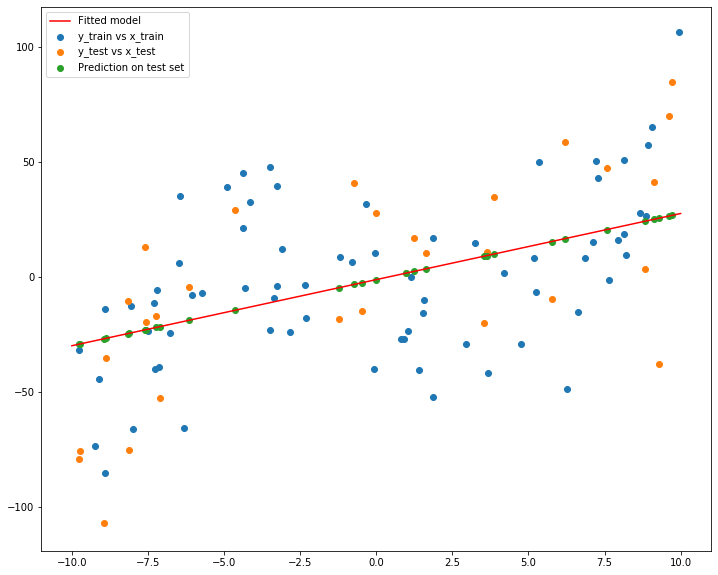

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.figure(figsize=(12,10))

lm = LinearRegression().fit(x_train, y_train)
plt.scatter(x_train, y_train)
plt.scatter(x_test,y_test)
y_all_pred = lm.predict(x_all)
plt.plot(x_all, y_all_pred, c='r')
y_test_pred = lm.predict(x_test)
plt.scatter(x_test,y_test_pred)
plt.legend(['Fitted model','y_train vs x_train','y_test vs x_test','Prediction on test set'],loc='best')

print("Mean squared error:", mean_squared_error(y_test,y_test_pred))

(b)

Mean squared error(2nd degree): 1276.3920769678755
Mean squared error(3rd degree): 1152.28399170982
Mean squared error(4th degree): 1183.1992247368405
Mean squared error(MLP, iter = 2000): 1098.819661549591
Mean squared error(MLP, iter = 200): 1442.660019846679


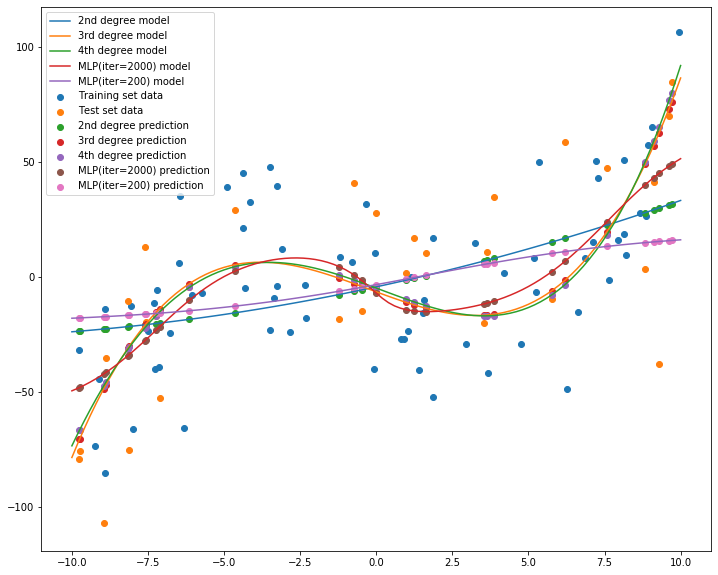

In [157]:
from sklearn.preprocessing import PolynomialFeatures
plt.figure(figsize=(12,10))
plt.scatter(x_train, y_train)
plt.scatter(x_test,y_test)

# 2nd degree
poly = PolynomialFeatures(2)
lm_2 = LinearRegression().fit(poly.fit_transform(x_train),y_train)
y_all_pred = lm_2.predict(poly.transform(x_all))
y_test_pred = lm_2.predict(poly.transform(x_test))
plt.scatter(x_test,y_test_pred)
plt.plot(x_all, y_all_pred)
print("Mean squared error(2nd degree):", mean_squared_error(y_test,y_test_pred))

# 3nd degree
poly = PolynomialFeatures(3)
lm_3 = LinearRegression().fit(poly.fit_transform(x_train),y_train)
y_all_pred = lm_3.predict(poly.transform(x_all))
y_test_pred = lm_3.predict(poly.transform(x_test))
plt.scatter(x_test,y_test_pred)
plt.plot(x_all, y_all_pred)

print("Mean squared error(3rd degree):", mean_squared_error(y_test,y_test_pred))

# 4th degree
poly = PolynomialFeatures(4)
lm_4 = LinearRegression().fit(poly.fit_transform(x_train),y_train)
y_all_pred = lm_4.predict(poly.transform(x_all))
y_test_pred = lm_4.predict(poly.transform(x_test))
plt.scatter(x_test,y_test_pred)
plt.plot(x_all, y_all_pred)
print("Mean squared error(4th degree):", mean_squared_error(y_test,y_test_pred))

# MLP with iter = 2000
mlp = mlp_1.fit(x_train,np.ravel(y_train))
y_all_pred = mlp.predict(x_all)
y_test_pred = mlp.predict(x_test)
plt.scatter(x_test,y_test_pred)
plt.plot(x_all, y_all_pred)
print("Mean squared error(MLP, iter = 2000):", mean_squared_error(y_test,y_test_pred))

# MLP with iter = 200
mlp = mlp_2.fit(x_train,np.ravel(y_train))
y_all_pred = mlp.predict(x_all)
y_test_pred = mlp.predict(x_test)
plt.scatter(x_test,y_test_pred)
plt.plot(x_all, y_all_pred)
print("Mean squared error(MLP, iter = 200):", mean_squared_error(y_test,y_test_pred))

plt.legend(['2nd degree model','3rd degree model','4th degree model','MLP(iter=2000) model',\
            'MLP(iter=200) model','Training set data','Test set data','2nd degree prediction',\
            '3rd degree prediction','4th degree prediction','MLP(iter=2000) prediction','MLP(iter=200) prediction'],\
           loc='best')

(c) 

Answer:
<br/>
The 3rd polynomial model performed the best.
<br/>
<br/>
The 4th polynomial overfits the training data, so even though the bias is reduced, the variance increases by a larger amount, so the overall performance is worse off.
<br/>
<br/>
The 2nd polynomial underfits the training data, the variance is lower due to a simpler model, but the bias increase by a larger amount, so the overall performance is worse off.


# Question 2. Number of data points required for Linear Regression (30pts)

In this question, we will explore empirically estimating a known data distribution. Let the data be generated by the probabilistic model $y_i = w^T x_i + \epsilon$. Here $x$ is 10 dimensional, and it's features are uniformly drawn values from $0$ to $1$. The true coefficients $w$ are set to be $1, 2, 3, \dots, 10$. Epsilon is drawn from a 0 mean unit variance normal distribution. We can now estimate these true coefficients by using linear regression on sample data points from the distribution. 

1. Generate 100 sample points $(x, y)$ according to the above distribution. Use the [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) function. (2pts)
2. Fit a linear regression model through the above data and report the MSE. (3 pts)
3. Generate 50 sample points $(x, y)$ to be the test set. Now, generate different amounts of train data points ranging from 20 data points to 1000 data points (intervals of 1) and plot how the MSE varies with increasing the train data. At the point where the MSE is minimum, print the corresponding coefficients. (10pts)
4. In this question, since we know the true coefficients, we can investigate how close the estimated coefficients are to the true coefficients. We will use $MSE(coefficients)$ which is MSE between the true coefficients and the estimated coefficients as the metric to see how close the estimated coefficients are to the true coefficients; this is not to be confused with the MSE between the predicted $y$ and the true $y$ which is commonly used. Hence, $MSE(coefficients) = \frac{1}{num\_coefficients}\sum_{i=1}^{num\_coefficients} (\theta_i - \hat{\theta}_i)^2$ where $\theta_i$ are the true coefficients and $\hat{\theta}_i$ are the estimated coefficients.
Using the $MSE(coefficients)$ as the metric, about how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes). Now, use only the first three coefficients, generate $x$ which is 3 dimensional (instead of 10 dimensional as before) and the corresponding $y$ for each $x$. In this case, when $x$ is three dimensional, how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes).(15pts)


In [158]:
#some useful code
# w_true = np.arange(10)+1
# x = np.random.uniform(size=(n, 10))
# e = np.random.normal(size=(n))


#for (30)
#use - 
#for num_data_points in range(20, 1001):

#for 5) the following code is useful:
# w_true_3 = w_true[0:3]
# x_3_dimensional = np.random.uniform(size=(n, 3))

1.

In [159]:
w_true = np.arange(10)+1
x = np.random.uniform(size=(100, 10))
e = np.random.normal(size=(100))
y = np.matmul(x,w_true) + e

2.

In [160]:
lm = LinearRegression().fit(x,y)
print("Mean squared error:", mean_squared_error(y,lm.predict(x)))

Mean squared error: 0.8251407849539479


3.

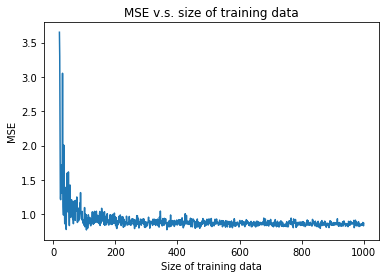

[1.3368022  2.02233906 2.25789598 4.32095264 5.53976884 4.87744115
 7.62027509 7.71055981 9.12194763 9.91850584]


In [161]:
#Generate 50 sample points
sample_index = np.random.choice(100, 50, replace = False)
x_test = x[sample_index,:]
y_test = y[sample_index]

#Size of training set v.s. MSE
MSE = []
coeffs = []
for num_data_points in range(20, 1001):
    sample_index = np.random.choice(100, num_data_points, replace = True)
    x_train = x[sample_index,:]
    y_train = y[sample_index]
    lm = LinearRegression().fit(x_train,y_train)
    MSE.append(mean_squared_error(y_test,lm.predict(x_test)))
    coeffs.append(lm.coef_)
    
plt.plot(range(20, 1001), MSE)
plt.title('MSE v.s. size of training data')
plt.xlabel('Size of training data')
plt.ylabel('MSE')
plt.show()

print(coeffs[np.argmin(MSE)])

4. 

In [162]:
#How many data points are required to have MSE(coefficients) < 0.01?
points_needed = []
for i in range(10):
    for num_data_points in range(1, 1001):
        
        w_true = np.arange(10)+1
        x = np.random.uniform(size=(num_data_points, 10))
        e = np.random.normal(size=(num_data_points))
        y = np.matmul(x,w_true) + e
                
        lm = LinearRegression().fit(x,y)
        
        if mean_squared_error(lm.coef_, w_true) < 0.01:
            points_needed.append(num_data_points)
            break

print("10 coefficients:")
print("Points needed:", np.average(points_needed))
print()

#What about 3 coefficients only?

points_needed = []
for i in range(10):
    for num_data_points in range(1, 1001):

        w_true_3 = np.arange(3)+1
        x = np.random.uniform(size=(num_data_points, 3))
        e = np.random.normal(size=(num_data_points))
        y = np.matmul(x,w_true_3) + e

        lm = LinearRegression().fit(x,y)
        
        if mean_squared_error(lm.coef_, w_true_3) < 0.01:
            points_needed.append(num_data_points)
            break
print("3 coefficients:")
print("Points needed:", np.average(points_needed))


10 coefficients:
Points needed: 316.2

3 coefficients:
Points needed: 86.9


# Question 3. Data Imputation Strategies (20pts)

The missing value problem is inevitable in predictive modeling and in order to build a useful model, it is important that these missing values are handled appropriately. There could be many reasons for the presence of missing values(represented as NaN in python) in the dataset, like the absence of information corresponding to the variable, failure to record the available value of the variable, some unknown semantics associated with NaN, etc. 

For the given dataset(file named q3_dataset.csv), fit a Linear Regression model to predict the dependent variable 'ViolentCrimesPerPop'. If you directly try to fit a model you would see an error saying that input contains NaN. So, in order to successfully fit a model, you need to handle these missing values and the performance of your model would depend on how you handle them. 

Your task is to try different imputation strategies for the different columns having missing values and see what works best. You could try the following -
1. Discard rows with missing data
2. Fill NaNs with 0s
3. Fill NaNs with column mean/mode/median
4. Use information from related columns (think of how you could do this)

A strategy could work better for one column and not work for another. Briefly justify why do you think that a particular strategy works better than the other.

Hint: Think about how do the missing values occur for a particular column like are they random or systematic, do they have any semantics?

Column-wise missing value percentage
ViolentCrimesPerPop     0.000000
PolicBudgPerPop        84.002006
population              9.979940
householdsize          19.959880
numbUrban               7.321966
pctUrban                0.000000
medIncome               0.000000
perCapInc               0.000000
LandArea                0.000000
PopDens                 0.000000
PolicCars              84.002006
PctUnemployed           4.964895
PctEmploy               4.964895
dtype: float64


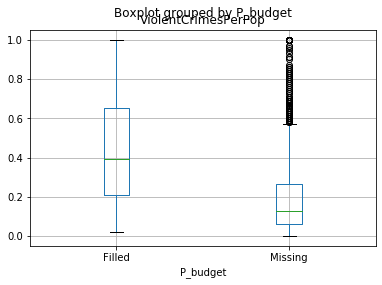

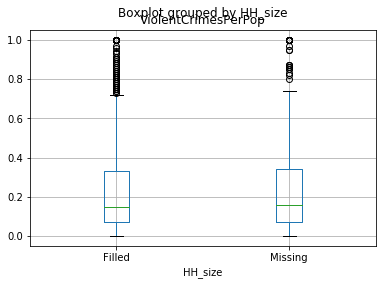

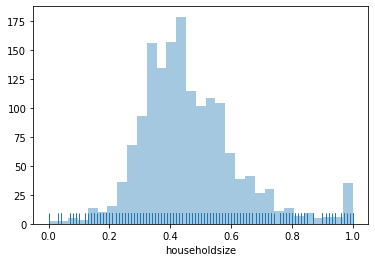

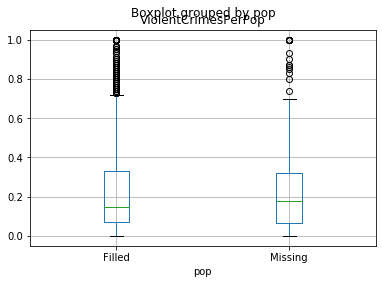

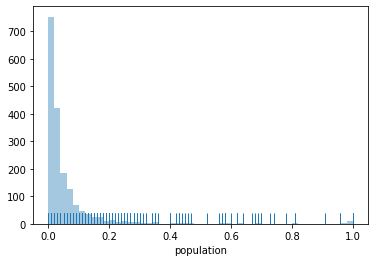

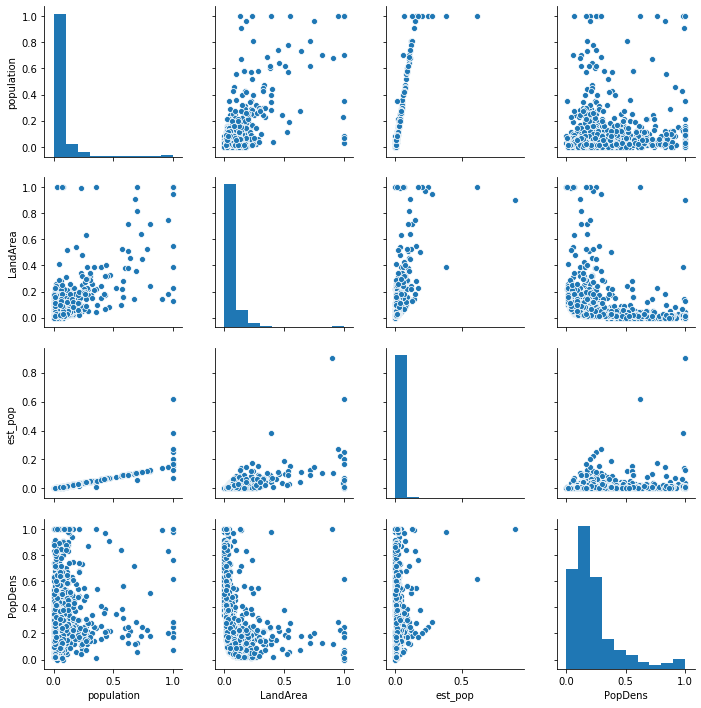

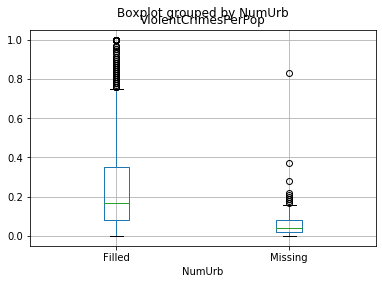

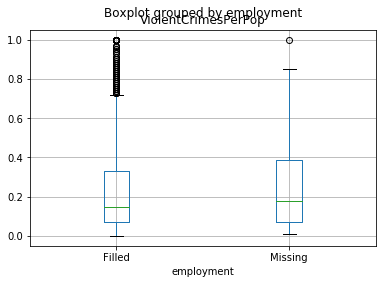

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np

dataset = pd.read_csv('q3_dataset.csv')
print("Column-wise missing value percentage")
print(dataset.isnull().sum()/len(dataset)*100)

X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)

#Are the rows with missing values in PctUnemployed & PctEmploy the same?  (Yes)
#print()
#print(dataset['PctUnemployed'].isnull().sum())
#print(dataset['PctEmploy'].isnull().sum())
#print(sum(dataset['PctUnemployed'].isnull() & dataset['PctEmploy'].isnull())) 

#Are the rows with missing values in PolicBudgPerPop & PolicCars the same?  (Yes)
#print()
#print(dataset['PolicBudgPerPop'].isnull().sum())
#print(dataset['PolicCars'].isnull().sum())
#print(sum(dataset['PolicBudgPerPop'].isnull() & dataset['PolicCars'].isnull())) 

import warnings
warnings.filterwarnings('ignore')
dataset['P_budget'] = 'Filled'
dataset['P_budget'][dataset['PolicBudgPerPop'].isnull()] = 'Missing'
dataset.boxplot(column=['ViolentCrimesPerPop'], by='P_budget')
plt.show()

dataset['HH_size'] = 'Filled'
dataset['HH_size'][dataset['householdsize'].isnull()] = 'Missing'
dataset.boxplot(column=['ViolentCrimesPerPop'], by='HH_size')
plt.show()
import seaborn as sns
sns.distplot(dataset['householdsize'][dataset['householdsize'].notnull()], kde=False, rug=True);
plt.show()

dataset['pop'] = 'Filled'
dataset['pop'][dataset['population'].isnull()] = 'Missing'
dataset.boxplot(column=['ViolentCrimesPerPop'], by='pop')
plt.show()
sns.distplot(dataset['population'][dataset['population'].notnull()], kde=False, rug=True);
plt.show()
dataset['est_pop'] = dataset['LandArea'] * dataset['PopDens']
sns.pairplot(dataset[['population','LandArea','est_pop','PopDens']])

dataset['NumUrb'] = 'Filled'
dataset['NumUrb'][dataset['numbUrban'].isnull()] = 'Missing'
dataset.boxplot(column=['ViolentCrimesPerPop'], by='NumUrb')
plt.show()

dataset['employment'] = 'Filled'
dataset['employment'][dataset['PctUnemployed'].isnull()] = 'Missing'
dataset.boxplot(column=['ViolentCrimesPerPop'], by='employment')
plt.show()


#dataset.head()

### Answer

Let's start with PolicBudgPerPop and PolicCars as these are the columns with the most missing data. Possible reasons for the missing data: <br/>
- Infrastructure investment is lacking in those areas, computer systems are not up to date
- Police are understaffed so people avoid mundane jobs such as data entry
- Those columns have been moved to another database system so people stopped updating them here <br/>

However, seeing that up to 84% of PolicBudgPerPop and PolicCars are null, I feel the 3rd reason is most likely, thus I will remove those two columns from the current anaysis. <br/>
<br/>
Areas with missing household size seem to have similar ViolentCrimesPerPop to the rest of the data. Filling them with  However overall distribution is slightly skewed so i will fill in the missing values with the median.
<br/>
<br/>
From the pair plot we can see that population is highly correlated to PopDens * LandArea, so we will fill in the missing values as such.
<br/>
<br/>
The observations with missing values for numbUrban correspond to lower levels of VioletCrimesPerPop, with only a few outliers with high values. I assume those missing values correspond to farmlands or relatvely uninhabited areas so I will fill them in as 0.
<br/>
<br/>
The observations with missing values for PctEmployed & PctUnemployed have similarly distributed ViolentCrimesPerPop as the other data, and they only account for 4% of the total data. So I will just remove those rows.

In [164]:
#Clean data & fit linear regression
dataset = pd.read_csv('q3_dataset.csv')

dataset = dataset.drop(['PolicBudgPerPop','PolicCars'],axis=1)
dataset['householdsize'][dataset['householdsize'].isnull()] = dataset['householdsize'].median() 
dataset['population'].fillna(dataset['PopDens']*dataset['LandArea'],inplace=True)
dataset['numbUrban'].fillna(0,inplace=True)
dataset.dropna(subset=['PctUnemployed','PctEmploy'],inplace=True)

X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)

lm = LinearRegression().fit(X_train,Y_train)
print('Mean Squared Error: ',mean_squared_error(Y_test,lm.predict(X_test)))

Mean Squared Error:  0.03200488555738518


# Question 4. PCA (conceptual) (5pts)

True of False : The goal of PCA is to create a lower-dimensional representation with principal components that are best at predicting the output variable.
Justify your answer

Answer:<br/>
No. PCA allows us to find a lower-dimensional representation that best describes the data on hand. Some information is discarded during this process. The information that is discarded could be usefull information instead of random noise. Thus there is no guarantee that the principal components chosen by PCA are the components that best predicts the output variable.